In [1]:
import glob
import natsort
import datetime
import useful_functions as uf

## OMPS UV Aerosol Index 
#### SWATHS to GLOBAL GRIDS

In [2]:
# Define your input and output path here:
input_path = f"/projekt1/remsens/work/jroschke/data/Suomi/"
output_path = f"/projekt7/remsens/data_new/site-campaign/leipzig-tropos/suomi/nc/2023/"

In [3]:

# Define date range
start_date = datetime.date(2023, 5, 1)
end_date = datetime.date(2023, 5, 2)  # Inclusive
date_list = [start_date + datetime.timedelta(days=x) for x in range((end_date - start_date).days + 1)]

# Loop through each day
for obs_date in date_list:
    obs_date_md = obs_date.strftime("%m%d")
    obs_date_ = obs_date.strftime("%d %b %Y")
    obs_date_str = obs_date.strftime("%Y%m%d")

    paths_omps = natsort.natsorted(glob.glob(
        input_path + f"OMPS-NPP_NMMIEAI-L2-p000_{obs_date.year}m{obs_date_md}*.h5"))
    
    
    uvai_mean, uvai_max = uf.swaths_to_grd(paths_omps)    
    ds = uf.create_nc_dataset(obs_date, uvai_mean, uvai_max)
    ds_out = output_path + f"{obs_date_str}_OMPS-NPP_NMMIEAI-L2_UVAI.nc"
    ds.to_netcdf(ds_out, format='NETCDF4')
    print("Dataset saved to: ", ds_out)

Dataset saved to:  /projekt7/remsens/data_new/site-campaign/leipzig-tropos/suomi/nc/2023/20230501_OMPS-NPP_NMMIEAI-L2_UVAI.nc
Dataset saved to:  /projekt7/remsens/data_new/site-campaign/leipzig-tropos/suomi/nc/2023/20230502_OMPS-NPP_NMMIEAI-L2_UVAI.nc


In [4]:
ds

<xarray.Dataset> Size: 1MB
Dimensions:    (longitude: 360, latitude: 180)
Coordinates:
  * latitude   (latitude) float64 1kB -90.0 -88.99 -87.99 ... 87.99 88.99 90.0
  * longitude  (longitude) float64 3kB -180.0 -179.0 -178.0 ... 179.0 180.0
Data variables:
    uvai_mean  (longitude, latitude) float64 518kB nan nan ... -0.6483 -0.7277
    uvai_max   (longitude, latitude) float64 518kB nan nan ... -0.6483 -0.7277
Attributes:
    title:            Aerosol Index on 2023-05-02 (date of observation)
    description:      OMPS Aerosol Index (PyroCumuloNimbus) layer indicates t...
    processing_date:  2025-10-22
    data_origin:      NMMIEAI-L2-NRT; OMPS_NPP_NMMIEAI_L2 doi:10.5067/40L92G8...
    author:           Johanna Roschke/ Institue for Meteorology , University ...
    contact:          johanna.roschke@uni-leipzig.de
    project:          TRAILS - TRAjectory based Airmass Identification of Lof...
    Conventions:      CF-1.8

In [5]:
import plotting as p

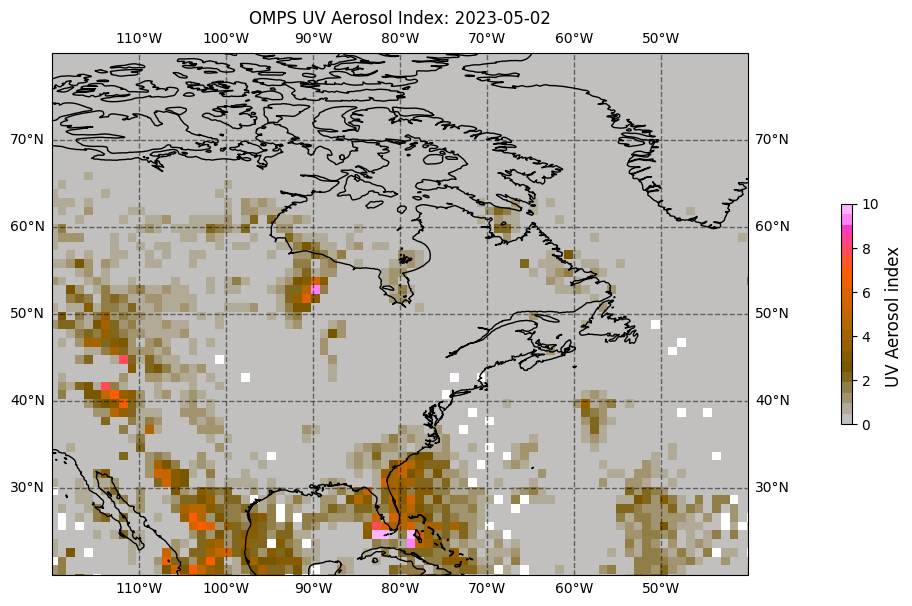

In [6]:
lon_min = -120
lon_max = -40
lat_min = 20
lat_max = 80
extent = [lon_min, lon_max, lat_min, lat_max]
fig, ax = p.plot_uvai_global_grd(ds, obs_date, extent)
